In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/data.csv')
data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [3]:
import urlparse
url = 'http://example.com/?q=abc&p=123'
par = urlparse.parse_qs(urlparse.urlparse(url).query)

print par


{'q': ['abc'], 'p': ['123']}


In [3]:
def getTokens(input):
    string = str(input.encode('utf-8'))
    tokenList = filter(None, re.split(r"[\./]", string))

    tokenList = list(set(tokenList))
    if 'com' in tokenList:
        tokenList.remove('com')
    if 'net' in tokenList:
        tokenList.remove('net')
    return tokenList


In [4]:
corpus = [d for d in data['url']]
y = [[1,0][d!= 'bad'] for d in data['label']]
vectorizer2 = TfidfVectorizer(tokenizer=getTokens)
X = vectorizer2.fit_transform(corpus)

idf2 = vectorizer2.idf_
#print dict(zip(vectorizer2.get_feature_names(), idf2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lgs = LogisticRegression()
param = {'C': np.logspace(-1, 2, 4),'penalty':['l1','l2']}
clf = GridSearchCV(lgs, param, n_jobs = -1)
clf.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([   0.1,    1. ,   10. ,  100. ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
def getAccuracy(clf, train, target):
    print "best score: %f"%clf.best_score_
    print "best parameters: %s"%clf.best_params_
    predict = clf.best_estimator_.predict(train)
    print(metrics.classification_report(target,predict))
    print(metrics.confusion_matrix(target, predict))
    print(cross_val_score(clf.best_estimator_, train, target, cv= 5).mean())
getAccuracy(clf, X_train, y_train)
getAccuracy(clf, X_test, y_test)

best score: 0.972087
best parameters: {'penalty': 'l2', 'C': 100.0}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    275692
          1       1.00      1.00      1.00     60679

avg / total       1.00      1.00      1.00    336371

[[275685      7]
 [     2  60677]]
0.974073268331
best score: 0.972087
best parameters: {'penalty': 'l2', 'C': 100.0}
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     69129
          1       0.98      0.88      0.93     14964

avg / total       0.98      0.98      0.98     84093

[[68887   242]
 [ 1727 13237]]
0.958522147119


In [5]:
lgs2 = LogisticRegression(C = 100, penalty= 'l2')
lgs2.fit(X_train, y_train)
print(lgs2.score(X_test, y_test))
predict2 = lgs2.predict(X_test)

print metrics.classification_report(y_test, predict2)
print(metrics.confusion_matrix(y_test, predict2))
print cross_val_score(lgs2, X_test, y_test).mean()

0.976585447065
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     69129
          1       0.98      0.88      0.93     14964

avg / total       0.98      0.98      0.98     84093

[[68887   242]
 [ 1727 13237]]
0.956215142759


In [26]:
X_predict = ['wikipedia.com','google.com/search=faizanahad','pakistanifacebookforever.com/getpassword.php/','www.radsport-voggel.de/wp-admin/includes/log.exe','ahrenhei.without-transfer.ru/nethost.exe','www.itidea.it/centroesteticosothys/img/_notes/gum.exe']
X_predict = vectorizer2.transform(X_predict)
y_Predict = lgs2.predict(X_predict)
print y_Predict #printing predicted values

[0 0 1 1 1 1]


In [6]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

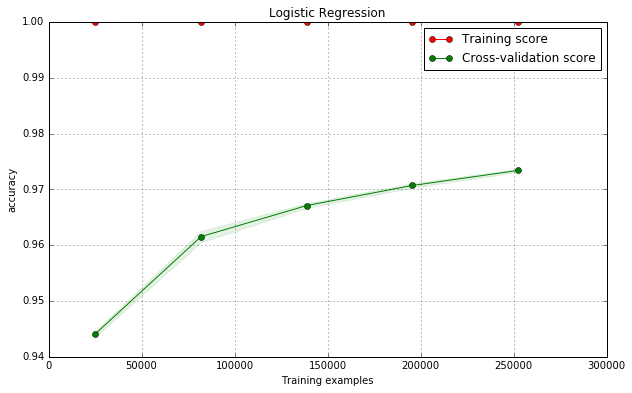

In [7]:
plot_learning_curve(lgs2, 'Logistic Regression', X_train, y_train, cv=4);

In [34]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

ROC AUC: 0.99


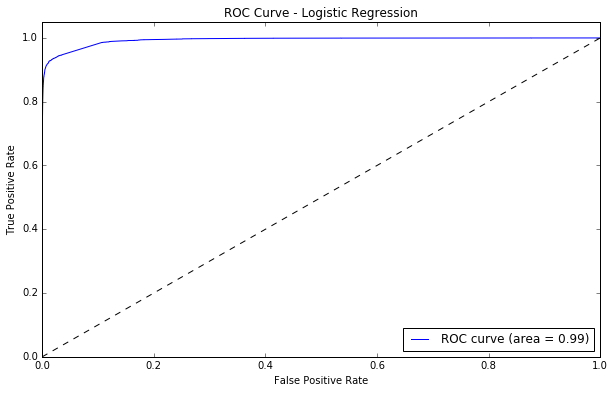

In [36]:
plot_roc_curve(lgs2, X_test, y_test, 'Logistic Regression')

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

420464

In [ ]:

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(idf2, y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()
